<a href="https://colab.research.google.com/github/haein0224/Kaggle_Study/blob/main/HandsOnMachinelearning_Ch4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

In [ ]:
X = 2*np.random.rand(100,1)
y = 4+3*X + np.random.randn(100,1)
X_b = np.c_[np.ones((100,1)), X] # 모든 샘플에 1을 더함 -> b0에 매치되도록
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[3.72993303],
       [3.18045864]])

In [ ]:
# 배치경사하강법
eta = 0.1 # 학습률 (결정이 매우 중요 -> grid search 사용)
n_iterations = 1000
m = 100

theta = np.random.randn(2,1) # 무작위 초기화(임의의 값으로 시작)

for iteration in range(n_iterations) :
  gradients = 2/m*X_b.T.dot(X_b.dot(theta) - y)
  theta = theta - eta*gradients


In [ ]:
theta

array([[3.72993303],
       [3.18045864]])

In [ ]:
# 간단한 학습 스케줄을 사용한 확률적 경사 하강법의 구현
n_epochs = 50
t0, t1 = 5,50 # 학습 스케쥴 파라미터

def learning_schedule(t) :
  return t0/(t+t1) # 반복횟수가 증가함에따라 점점 학습률을 줄임

theta = np.random.randn(2,1)

for epoch in range(n_epochs) :
  for i in range(m) : # 한번의 반복에서 m번 되풀이함
    random_index = np.random.randint(m) # m보다 작은 정수중에 랜덤으로 하나 추출 -> 그래디언트 구할 하나의 데이터 인덱스 추출
    xi = X_b[random_index:random_index+1]
    yi = y[random_index:random_index+1]
    gradients = 2*xi.T.dot(xi.dot(theta)-yi)
    eta = learning_schedule(epoch*m+i)
    theta = theta-eta*gradients


In [ ]:
theta

array([[3.75914358],
       [3.20359383]])

In [ ]:
# 사이킷럿에서 SGD방식으로 선형회귀를 사용하려면 SGDRegressor클래스를 사용함 (eta = 0.1, MSE를 비용함수로 사용)
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X,y.ravel())

SGDRegressor(eta0=0.1, max_iter=50, penalty=None)

In [ ]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.73511767]), array([3.20720737]))

In [ ]:
# 다항회귀
# 데이터 생성 - 약간의 노이즈 포함
m = 100
X = 6*np.random.rand(m,1)-3
y = 0.5*X**2 + X + 2 + np.random.randn(m,1)

In [ ]:
# 사이킷럿의 PolynomialFeatures 사용 - 훈련세트의 각특성을 제곱해 새로운 특성으로 추가
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False) # 2차식이 되도록하는 다항식을 정의
poly_features3 = PolynomialFeatures(degree=3, include_bias=False) # 변수가 하나가 아니라 여러개인 경우 각각의 n차항뿐만아니라 교차항까지 생성해줌

X_poly = poly_features.fit_transform(X)  # fit transform하여 새로운 데이터를 생성
X_poly3 = poly_features3.fit_transform(X)

X[0], X_poly[0], X_poly3[0]

# 예시에서는 2차만 사용

(array([0.86695696]),
 array([0.86695696, 0.75161437]),
 array([0.86695696, 0.75161437, 0.6516173 ]))

In [ ]:
# linear regression의 적용
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y) # 2차 다항회귀가 되는 것
lin_reg.intercept_, lin_reg.coef_

# 데이터 생성할때 부여한 값이랑 거의 비슷하게 나옴!

(array([1.80122946]), array([[1.01143318, 0.5678573 ]]))

In [ ]:
# 학습곡선 - 과대, 과소 적합 판단하는 방법 중 하나
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

def plot_learning_curves(model, X, y) :
  X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)
  train_errors, val_errors = [], []
  for m in range(1, len(X_train)) :
    model.fit(X_train[:m], y_train[:m])
    y_train_predict = model.predict(X_train[:m])
    y_val_predict = model.predict(X_val)
    train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))
  plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="훈련 세트")
  plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="검증 세트")

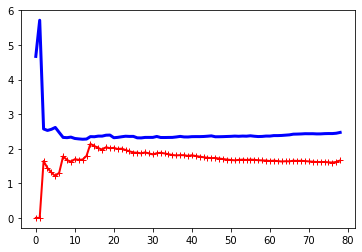

In [ ]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

## 규제가 있는 선형 회귀
# 릿지

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X.astype(np.float64))
y = scaler.fit_transform(y.astype(np.float64))

In [ ]:
# ridge - 정규방정식
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver='cholesky')
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[1.07099997]])

In [ ]:
# ridge - 확률적경사하강법
sgd_reg = SGDRegressor(max_iter=15, penalty="l2") # L2 penalty 지정으로 릿지사용
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


array([1.03944653])

In [ ]:
lin_reg.fit(X, y)
lin_reg.predict([[1.5]])

array([[1.08170997]])

In [ ]:
# Lasso - SGDRegressor
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([0.93170997])

In [ ]:
# ElasticNet
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([0.9587714])

In [ ]:
m = 100
X = 6*np.random.rand(m,1)-3
y = 0.5*X**2 + X + 2 + np.random.randn(m,1)

# 변환 파이프라인
# 변환 단계가 많은 경우 연속된 변환을 순서대로 처리하도록하는 pipeline 클래스를 활용함
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor

# 조기종료
from sklearn.base import clone

# 데이터 준비
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

poly_scaler = Pipeline([
                        ('poly_features', PolynomialFeatures(degree=90, include_bias=False)),
                        ('std_scaler', StandardScaler()) ])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(n_iter_no_change=1, warm_start=True, penalty=None, learning_rate = "constant", eta0=0.0005) # warm_start : 이전 파라미터에서 시작하도록함

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000) :
  sgd_reg.fit(X_train_poly_scaled, y_train)
  y_val_predict = sgd_reg.predict(X_val_poly_scaled)
  val_error = mean_squared_error(y_val, y_val_predict)
  if val_error < minimum_val_error : # val_error가 줄어들때마다 업데이트해서 정보 저장
    minimum_val_error = val_error 
    best_epoch = epoch 
    best_model = clone(sgd_reg)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linea

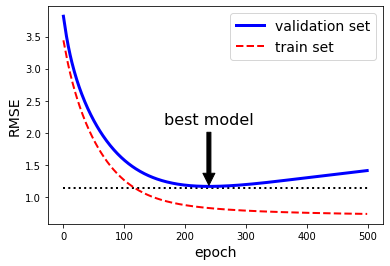

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor

np.random.seed(42)
m = 100
X = 6*np.random.rand(m,1)-3
y = 0.5*X**2 + X + 2 + np.random.randn(m,1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(),test_size = 0.5, random_state=10)

poly_scaler = Pipeline([
                        ('poly_features', PolynomialFeatures(degree=90, include_bias=False)),
                        ('std_scaler', StandardScaler()) ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, warm_start=True, penalty=None, learning_rate = "constant", eta0=0.0005, random_state=42) # warm_start : 이전 파라미터에서 시작하도록함

n_epochs=500
train_errors, val_errors = [], []

for epoch in range(n_epochs) :
  sgd_reg.fit(X_train_poly_scaled, y_train)
  y_train_predict = sgd_reg.predict(X_train_poly_scaled)
  y_val_predict = sgd_reg.predict(X_val_poly_scaled)
  train_errors.append(mean_squared_error(y_train, y_train_predict))
  val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors) # store index
best_val_rmse = np.sqrt(val_errors[best_epoch])

best_val_rmse -= 0.03 # 그래프에서 명확하게 보이기 위해서하는 것

plt.annotate('best model', xy=(best_epoch, best_val_rmse), xytext=(best_epoch, best_val_rmse+1), ha='center', arrowprops=dict(facecolor='black', shrink=0.05), fontsize=16)
plt.plot([0,n_epochs], [best_val_rmse, best_val_rmse], 'k:', linewidth=2)
plt.plot(np.sqrt(val_errors), 'b-', linewidth=3, label='validation set')
plt.plot(np.sqrt(train_errors), 'r--', linewidth=2, label='train set')
plt.legend(loc='upper right', fontsize=14)
plt.xlabel('epoch', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.show()

In [ ]:
# 4.6.3 결정경계

In [ ]:
# 꽃잎의 너비를 기반으로 Iris-Versicolor 종을 구분하는 분류기를 생성하고자함
import numpy as np
from sklearn import datasets
iris = datasets.load_iris()

X = iris['data'][:, 3:] # 꽃잎의 너비
y = (iris['target'] == 2).astype(np.int) # Iris-Virginica 면 1, 그렇지 않으면 0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [ ]:
iris['data'][0:4,3:], iris['data'][0:4,3] # 출력해오는 방식에 차이가 있음!!!

(array([[0.2],
        [0.2],
        [0.2],
        [0.2]]), array([0.2, 0.2, 0.2, 0.2]))

In [ ]:
# 로지스틱 회귀 모델을 훈련
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver='liblinear')
log_reg.fit(X, y)

LogisticRegression(solver='liblinear')

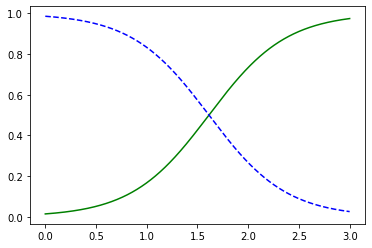

In [ ]:
# 꽃잎의 너비가 0~3cm인 꽃에 대해 모델의 추정 확률을 계산
import matplotlib.pyplot as plt
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new) # 첫번째 열은 아닐 확률 두번째열은 맞을 확률 -> 더 높은 쪽으로 분류됨

# 시각화
plt.plot(X_new, y_proba[:,1], "g-", label="Iris-Virginica O")
plt.plot(X_new, y_proba[:,0], "b--", label="Iris-Virginica X")
plt.legend(loc='right', fontsize=10)
plt.xlabel('width(cm)', fontsize=10)
plt.ylabel('probability', fontsize=10)
plt.show()

In [ ]:
y_proba

array([[0.98554411, 0.01445589],
       [0.98543168, 0.01456832],
       [0.98531838, 0.01468162],
       ...,
       [0.02618938, 0.97381062],
       [0.02598963, 0.97401037],
       [0.02579136, 0.97420864]])

In [ ]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])